# COGS 108 - Final Project: Marvel Movie Ratings

# Names

- Ellie Wang
- Colin Sutedja
- Abby Hahm
- Jasmine Hong
- Alyssa Tallada

# Abstract

As the Marvel Cinematic Universe (MCU) continues to produce famous, record-breaking movies, our team was interested in learning about what contributes or are related to producing a successful movie. Our project seeks to discover relationships between budget, character inclusion, and box office revenues and the Rotten Tomato ratings of Marvel movies, which is our form of measuring their success. We collected, cleaned, merged, and analyzed data regarding Marvel movies and analyzed these relationships through EDA and OLS regression results to determine any significant relationships. We ultimately concluded that there is a relationship between the budget for production and Box Office revenue and the Rotten Tomato ratings of Marvel movies.

# Research Question

How do variables like budget, character inclusion, and box office revenue impact the Rotten Tomato scores of Marvel movies?

## Background and Prior Work

Marvel movies have become cultural and financial powerhouses, generating billions at the global box office and earning substantial critical acclaim. These films are often praised for their compelling storylines, influential characters, and visual spectacle. However, their critical reception, such as Rotten Tomato scores, can vary significantly. Understanding how variables like budget, character inclusion, and box office revenue influence these scores provides insights into the dynamics of blockbuster success. This research seeks to examine these relationships and determine whether certain factors consistently predict better reviews.

For a further understanding of this project, Rotten Tomatoes is a popular website that aggregates movie and television reviews to provide an overall indication of critical and audience reception. The site assigns a Tomatometer score to movies, representing the percentage of professional critics' reviews that are positive (i.e., "fresh"). A score above 60% is labeled "fresh," while a score below 60% is deemed "rotten." The platform is influential in shaping public perception of movies. High Tomatometer scores can boost a film's reputation, encouraging more people to watch it, while low scores can dissuade potential audiences <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). For major franchises like Marvel, a high score often signifies that the movie appeals to both critics and fans, which is important for maintaining brand loyalty and driving box office success.

The Kaggle project titled "Marvel movies| Data Analysis | Data Vis | Seaborn" explores various trends in Marvel Cinematic Universe (MCU) movies, including box office performance, release patterns, and ratings<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). This analysis identifies correlations between box office earnings, audience reception, and production metrics, which align with our focus on understanding how budget, character inclusion, and box office revenue impact Rotten Tomatoes scores. Another similar Kaggle project, "Marvel Cinematic Universe: Data Visualization", investigates relationships among MCU movies, focusing on trends like average ratings over time and gross earnings<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). This work demonstrates how visual data exploration can reveal patterns, such as which release phases were most successful or how the introduction of key characters impacted revenue and audience appeal.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Detrow, Scott, and Marc Rivers. “Rotten Tomatoes Can Make or Break a Film’s Success - Is That a Problem?” NPR, 16 Sept. 2023, www.npr.org/2023/09/16/1200012615/rotten-tomatoes-can-make-or-break-a-films-success-is-that-a-problem. Accessed 05 Dec. 2024.
marvel-movies-data-analysis-data-vis-seaborn.
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Singh, K. (2022) Marvel movies| Data Analysis | Data Vis | Seaborn. *Kaggle*. https://www.kaggle.com/code/karats/marvel-movies-data-analysis-data-vis-seaborn/notebook
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Atharvsabde, ASabde. “Marvel Cinematic Universe: Data Visualization.” Kaggle, 17 June 2023, www.kaggle.com/code/atharvsabde/marvel-cinematic-universe-data-visualization.

# Hypothesis


Higher production budgets, the inclusion of popular Marvel characters, and strong box office performance are likely to correlate with higher Rotten Tomato scores. A larger budget may enhance production quality, while fan-favorite characters can attract positive attention from critics and audiences. Similarly, higher box office revenue could reflect broad appeal, aligning with favorable critical reception.

# Data

## Data overview

- MCU Movie Dataset
    - Link to the dataset: https://www.kaggle.com/datasets/dalepeh/mcu-movies-dataset/data
    - Number of observations: 32
    - Number of variables: 15

This dataset provides box office information, release dates, ratings, budget and gross revenue. These metrics help us understand the movie's financial success based on the different variables present. This dataset is already pretty clean but we can make the column names and dates consistent format while dropping unnecessary columns that aren't helpful for our project like movie image.

- Marvel Movie Box Office (MCU, Sony, Fox, Etc.)
    - Link to the dataset: https://www.kaggle.com/datasets/monkeybusiness7/marvel-cinematic-universe-box-office
    - Number of observations: 68
    - Number of variables: 23

The dataset provides box office information including international, worldwide, domestic, and inflation adjusted revenue per movie as integers. It also includes different rating system scores from IMDb, Rotten Tomato, and more, also represented as integers. These variables will help us analyze box office trends across many Marvel movies. To clean this dataset, as it is already relatively tidy, we will remove columns that won’t be used in our analysis and address any nulls we may find.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## MCU Movie Dataset

In [ ]:
import pandas as pd
import numpy as np

# link for csv download
# https://www.kaggle.com/datasets/dalepeh/mcu-movies-dataset/data

box_office = pd.read_csv('/content/drive/MyDrive/cogs 108/box_office.csv')
box_office.head()

,Phase,Film,Year_Release,U.S. release date,Box office gross U.S. and Canada,Box office gross Other territories,Box office gross Worldwide,All-time ranking U.S. and Canada,All-time ranking Worldwide,Rotten Tomatoes Rating,CinemaScore,Budget,Director,Producer,movie_image
0,Phase One,Iron Man,2008,2-May-08,319034126,266762121,585796247,79,176,94,A,140000000,Jon Favreau,Avi Arad and Kevin Feige,https://upload.wikimedia.org/wikipedia/en/0/02...
1,Phase One,The Incredible Hulk,2008,13-Jun-08,134806913,129964083,264770996,465,593,67,A−,150000000,Louis Leterrier,"Avi Arad, Gale Anne Hurdand Kevin Feige",https://upload.wikimedia.org/wikipedia/en/f/f0...
2,Phase One,Iron Man 2,2010,7-May-10,312433331,311500000,623933331,85,158,71,A,200000000,Jon Favreau,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/e/ed...
3,Phase One,Thor,2011,6-May-11,181030624,268295994,449326618,262,268,77,B+,150000000,Kenneth Branagh,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/9/95...
4,Phase One,Captain America: The First Avenger,2011,22-Jul-11,176654505,193915269,370569774,279,367,79,A−,140000000,Joe Johnston,Kevin Feige,https://upload.wikimedia.org/wikipedia/en/3/37...


In [ ]:
# convert 'us_release_date' column to datetime format
box_office['U.S. release date'] = pd.to_datetime(box_office['U.S. release date'], format='%d-%b-%y', errors='coerce')

# drop excess columns
box_office.drop(columns=['Year_Release'], inplace=True)
box_office.drop(columns=['movie_image'], inplace=True)

box_office.head()

,Phase,Film,U.S. release date,Box office gross U.S. and Canada,Box office gross Other territories,Box office gross Worldwide,All-time ranking U.S. and Canada,All-time ranking Worldwide,Rotten Tomatoes Rating,CinemaScore,Budget,Director,Producer
0,Phase One,Iron Man,2008-05-02,319034126,266762121,585796247,79,176,94,A,140000000,Jon Favreau,Avi Arad and Kevin Feige
1,Phase One,The Incredible Hulk,2008-06-13,134806913,129964083,264770996,465,593,67,A−,150000000,Louis Leterrier,"Avi Arad, Gale Anne Hurdand Kevin Feige"
2,Phase One,Iron Man 2,2010-05-07,312433331,311500000,623933331,85,158,71,A,200000000,Jon Favreau,Kevin Feige
3,Phase One,Thor,2011-05-06,181030624,268295994,449326618,262,268,77,B+,150000000,Kenneth Branagh,Kevin Feige
4,Phase One,Captain America: The First Avenger,2011-07-22,176654505,193915269,370569774,279,367,79,A−,140000000,Joe Johnston,Kevin Feige


## Marvel Movie Box Office (MCU, Sony, Fox, Etc.)

In [ ]:
# link for csv download
# https://www.kaggle.com/datasets/monkeybusiness7/marvel-cinematic-universe-box-office?resource=dwnload

marvel_box = pd.read_csv('/content/drive/MyDrive/cogs 108/marvel_box_office.csv')
marvel_box.head()

,Movie,Release Date,Release Month,Release Day,Release Year,Ownership,Domestic Box Office,Inflation Adjusted Domestic,International Box Office,Inflation Adjusted International,...,Inflation Adjusted Opening Weekend,Budget,Inflation Adjusted Budget,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score,Run Time In Minutes,Phase,Director
0,Iron Man,5/2/2008,May,2,2008,Marvel Studios,318604126,467231126,266567421,390919596,...,149756442,186000000,272767935,7.9,79,94,91,126,One,Jon Favreau
1,The Incredible Hulk,6/13/2008,June,13,2008,Marvel Studios,134806913,197704288,130766946,191779378,...,81268794,137500000,201653899,6.6,61,67,69,112,One,Louis Leterrier
2,Iron Man 2,5/7/2010,May,7,2010,Marvel Studios,312433331,416973763,308723058,412022030,...,170992360,170000000,226882130,6.9,57,72,71,124,One,Jon Favreau
3,Thor,5/6/2011,May,6,2011,Marvel Studios,181030624,240384926,268295994,356261892,...,87271973,150000000,199180327,7.0,57,77,76,115,One,Kenneth Brangh
4,Captain America: The First Avenger,7/22/2011,July,22,2011,Marvel Studios,176654505,234574020,193915271,257494054,...,86389190,140000000,185901643,6.9,66,80,75,124,One,Joe Johnston


## Merging Datasets

In [ ]:
box_office = box_office[['Film',
                         'All-time ranking U.S. and Canada',
                         'All-time ranking Worldwide',
                         'Producer']]

marvel_box = marvel_box.rename(columns = {'Movie': 'Film'})

merged_df = pd.merge(marvel_box, box_office, on='Film', how='outer')
merged_df

,Film,Release Date,Release Month,Release Day,Release Year,Ownership,Domestic Box Office,Inflation Adjusted Domestic,International Box Office,Inflation Adjusted International,...,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score,Run Time In Minutes,Phase,Director,All-time ranking U.S. and Canada,All-time ranking Worldwide,Producer
0,Ant-Man,7/17/2015,July,17.0,2015.0,Marvel Studios,180202163.0,225092376.0,3.386563e+08,4.230191e+08,...,7.3,64.0,83.0,85.0,117.0,Two,Peyton Reed,265.0,217.0,Kevin Feige
1,Ant-Man and the Wasp,7/6/2018,July,6.0,2018.0,Marvel Studios,216648740.0,250418353.0,4.064959e+08,4.698575e+08,...,7.0,70.0,87.0,80.0,118.0,Three,Peyton Reed,185.0,160.0,Kevin Feige and Stephen Broussard
2,Ant-Man and the Wasp: Quantumania,2/17/2023,February,17.0,2023.0,Marvel Studios,214506909.0,214506909.0,2.491284e+08,2.491284e+08,...,6.1,48.0,46.0,82.0,124.0,Five,Peyton Reed,200.0,253.0,Kevin Feige and Stephen Broussard
3,Avengers Infinity War,4/27/2018,April,27.0,2018.0,Marvel Studios,678815482.0,784624259.0,1.369544e+09,1.583019e+09,...,8.4,68.0,85.0,92.0,149.0,Three,Anthony and Joe Russo,NaN,NaN,NaN
4,Avengers: Age of Ultron,5/1/2015,May,1.0,2015.0,Marvel Studios,459005868.0,573348960.0,9.363111e+08,1.169556e+09,...,7.3,66.0,76.0,82.0,141.0,Two,Joss Whedon,21.0,12.0,Kevin Feige
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,X-Men: Apocalypse,5/27/2016,May,27.0,2016.0,20th Century Fox,155442489.0,189226511.0,3.870951e+08,4.712267e+08,...,6.9,52.0,47.0,65.0,144.0,NaN,Brian Singer,NaN,NaN,NaN
67,X-Men: Days of Future Past,5/23/2014,May,23.0,2014.0,20th Century Fox,233921534.0,301492496.0,5.139412e+08,6.623992e+08,...,7.9,75.0,90.0,91.0,132.0,NaN,Brian Singer,NaN,NaN,NaN
68,X-Men: First Class,6/3/2011,June,3.0,2011.0,20th Century Fox,146408305.0,194411031.0,2.090000e+08,2.775246e+08,...,7.7,65.0,86.0,87.0,131.0,NaN,Matthew Vaughn,NaN,NaN,NaN
69,X-Men: The Last Stand,5/26/2006,May,26.0,2006.0,20th Century Fox,234362462.0,376768960.0,2.248985e+08,3.615544e+08,...,6.6,58.0,57.0,61.0,104.0,NaN,Brett Ratner,NaN,NaN,NaN


In [ ]:
# standardize column names to lower case and no white space
merged_df.columns = merged_df.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.lower()
merged_df.head()

,film,release_date,release_month,release_day,release_year,ownership,domestic_box_office,inflation_adjusted_domestic,international_box_office,inflation_adjusted_international,...,imdb_score,meta_score,tomatometer,rotten_tomato_audience_score,run_time_in_minutes,phase,director,all-time_ranking_us_and_canada,all-time_ranking_worldwide,producer
0,Ant-Man,7/17/2015,July,17.0,2015.0,Marvel Studios,180202163.0,225092376.0,3.386563e+08,4.230191e+08,...,7.3,64.0,83.0,85.0,117.0,Two,Peyton Reed,265.0,217.0,Kevin Feige
1,Ant-Man and the Wasp,7/6/2018,July,6.0,2018.0,Marvel Studios,216648740.0,250418353.0,4.064959e+08,4.698575e+08,...,7.0,70.0,87.0,80.0,118.0,Three,Peyton Reed,185.0,160.0,Kevin Feige and Stephen Broussard
2,Ant-Man and the Wasp: Quantumania,2/17/2023,February,17.0,2023.0,Marvel Studios,214506909.0,214506909.0,2.491284e+08,2.491284e+08,...,6.1,48.0,46.0,82.0,124.0,Five,Peyton Reed,200.0,253.0,Kevin Feige and Stephen Broussard
3,Avengers Infinity War,4/27/2018,April,27.0,2018.0,Marvel Studios,678815482.0,784624259.0,1.369544e+09,1.583019e+09,...,8.4,68.0,85.0,92.0,149.0,Three,Anthony and Joe Russo,NaN,NaN,NaN
4,Avengers: Age of Ultron,5/1/2015,May,1.0,2015.0,Marvel Studios,459005868.0,573348960.0,9.363111e+08,1.169556e+09,...,7.3,66.0,76.0,82.0,141.0,Two,Joss Whedon,21.0,12.0,Kevin Feige


In [ ]:
rows_with_missing_values = merged_df[merged_df.isnull().any(axis=1)]
rows_with_missing_values.head()

,film,release_date,release_month,release_day,release_year,ownership,domestic_box_office,inflation_adjusted_domestic,international_box_office,inflation_adjusted_international,...,imdb_score,meta_score,tomatometer,rotten_tomato_audience_score,run_time_in_minutes,phase,director,all-time_ranking_us_and_canada,all-time_ranking_worldwide,producer
3,Avengers Infinity War,4/27/2018,April,27.0,2018.0,Marvel Studios,678815482.0,784624259.0,1.369544e+09,1.583019e+09,...,8.4,68.0,85.0,92.0,149.0,Three,Anthony and Joe Russo,NaN,NaN,NaN
6,Avengers: Infinity War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,Kevin Feige
10,Blade,8/21/1998,August,21.0,1998.0,New Line Cinema,70141876.0,157482710.0,6.109581e+07,1.371725e+08,...,7.1,47.0,58.0,78.0,120.0,NaN,Stephen Norrington,NaN,NaN,NaN
11,Blade II,3/22/2002,March,22.0,2002.0,New Line Cinema,81676888.0,148030572.0,7.266171e+07,1.316915e+08,...,6.7,52.0,57.0,68.0,117.0,NaN,Guillermo del Toro,NaN,NaN,NaN
12,Blade: Trinity,12/8/2004,December,8.0,2004.0,New Line Cinema,52397389.0,88619322.0,7.895578e+07,1.335373e+08,...,5.8,38.0,24.0,58.0,113.0,NaN,David S. Goyer,NaN,NaN,NaN


In [ ]:
merged_df.loc[merged_df['film'] == 'Avengers: Infinity War', [
    'all-time_ranking_us_and_canada',
    'all-time_ranking_worldwide',
    'producer'
]] = [6.0, 5.0, 'kevin feige']

merged_df.loc[merged_df['film'] == "The Avengers", [
    'all-time_ranking_us_and_canada',
    'all-time_ranking_worldwide',
    'producer'
]] = [10.0,	9.0, 'kevin feige']

merged_df.loc[merged_df['film'] == "Guardians of The Galaxy", [
    'all-time_ranking_us_and_canada',
    'all-time_ranking_worldwide',
    'producer'
]] = [68.0,	104.0,	'kevin feige']

films_to_drop = ["Avengers: Infinity War", "Marvel's The Avengers", "Guardians of the Galaxy"]

merged_df = merged_df[~merged_df['film'].isin(films_to_drop)]

merged_df.head()

,film,release_date,release_month,release_day,release_year,ownership,domestic_box_office,inflation_adjusted_domestic,international_box_office,inflation_adjusted_international,...,imdb_score,meta_score,tomatometer,rotten_tomato_audience_score,run_time_in_minutes,phase,director,all-time_ranking_us_and_canada,all-time_ranking_worldwide,producer
0,Ant-Man,7/17/2015,July,17.0,2015.0,Marvel Studios,180202163.0,225092376.0,3.386563e+08,4.230191e+08,...,7.3,64.0,83.0,85.0,117.0,Two,Peyton Reed,265.0,217.0,Kevin Feige
1,Ant-Man and the Wasp,7/6/2018,July,6.0,2018.0,Marvel Studios,216648740.0,250418353.0,4.064959e+08,4.698575e+08,...,7.0,70.0,87.0,80.0,118.0,Three,Peyton Reed,185.0,160.0,Kevin Feige and Stephen Broussard
2,Ant-Man and the Wasp: Quantumania,2/17/2023,February,17.0,2023.0,Marvel Studios,214506909.0,214506909.0,2.491284e+08,2.491284e+08,...,6.1,48.0,46.0,82.0,124.0,Five,Peyton Reed,200.0,253.0,Kevin Feige and Stephen Broussard
3,Avengers Infinity War,4/27/2018,April,27.0,2018.0,Marvel Studios,678815482.0,784624259.0,1.369544e+09,1.583019e+09,...,8.4,68.0,85.0,92.0,149.0,Three,Anthony and Joe Russo,NaN,NaN,NaN
4,Avengers: Age of Ultron,5/1/2015,May,1.0,2015.0,Marvel Studios,459005868.0,573348960.0,9.363111e+08,1.169556e+09,...,7.3,66.0,76.0,82.0,141.0,Two,Joss Whedon,21.0,12.0,Kevin Feige


# Results

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr

### Budget and Rotten Tomatoes

In this section, we are looking for a relationship between the film's budget and the Rotten Tomato ratings that the respective movies receive.

Let's take a look at our dataframe of just the films and their respective budgets and tomatometer

In [ ]:
budget_df = merged_df[['film', 'release_date', 'inflation_adjusted_budget', 'budget', 'tomatometer']]
budget_df

,film,release_date,inflation_adjusted_budget,budget,tomatometer
0,Ant-Man,7/17/2015,162384338.0,130000000.0,83.0
1,Ant-Man and the Wasp,7/6/2018,150263444.0,130000000.0,87.0
2,Ant-Man and the Wasp: Quantumania,2/17/2023,200000000.0,200000000.0,46.0
3,Avengers Infinity War,4/27/2018,346761799.0,300000000.0,85.0
4,Avengers: Age of Ultron,5/1/2015,455925262.0,365000000.0,76.0
...,...,...,...,...,...
66,X-Men: Apocalypse,5/27/2016,216686693.0,178000000.0,47.0
67,X-Men: Days of Future Past,5/23/2014,257772331.0,200000000.0,90.0
68,X-Men: First Class,6/3/2011,212459020.0,160000000.0,86.0
69,X-Men: The Last Stand,5/26/2006,337603048.0,210000000.0,57.0


Let's see the distribution of budget to see the typical budget a marvel movie gets

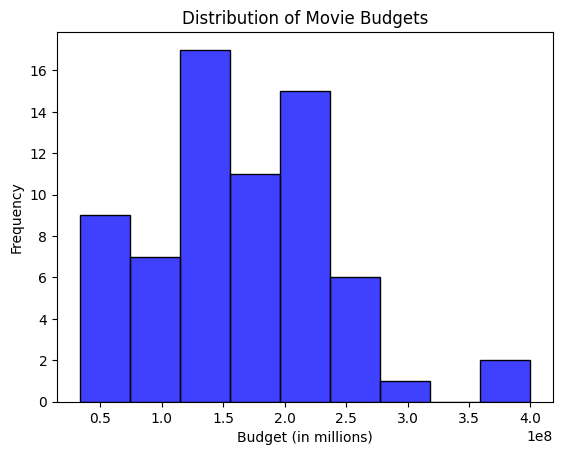

In [ ]:
# Visualize Budget Distribution
sns.histplot(merged_df['budget'], color='blue')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in millions)')
plt.ylabel('Frequency')
plt.show()

This doesn't seem to indicate anything as we see various peaks of frequency for the differnet budgets but we notice in the dataset that there are two values of budget (normal budget vs inflation adjusted budget). So now let's see the distribution of the inflation adjusted budget

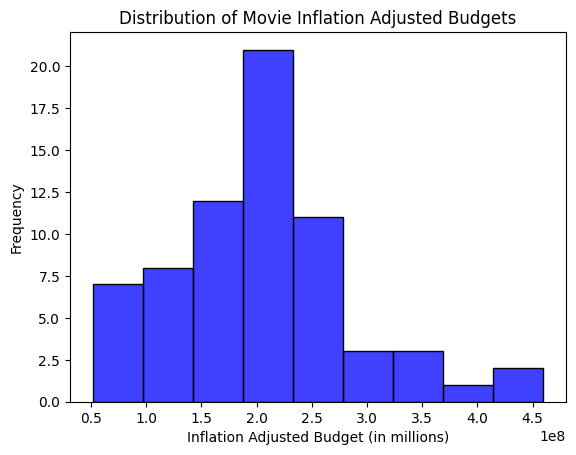

In [ ]:
# Visualize Budget (infaltion adjusted) Distribution
sns.histplot(merged_df['inflation_adjusted_budget'], color='blue')
plt.title('Distribution of Movie Inflation Adjusted Budgets')
plt.xlabel('Inflation Adjusted Budget (in millions)')
plt.ylabel('Frequency')
plt.show()

We can see that the inflation adjusted budget is more of a normal distribution compared to the original budget column which is important to note as without adjusting for inflation, older movies may seem to have a small budget even if they were high-budget productions in their time. This now ensures a more consistent analysis for each movie's budget that is not affected due to the change in currency value but rather on the actual difference in spending for the movie. This gives us a better idea that most marvel films have a budget range equivalent to around $2.2 million

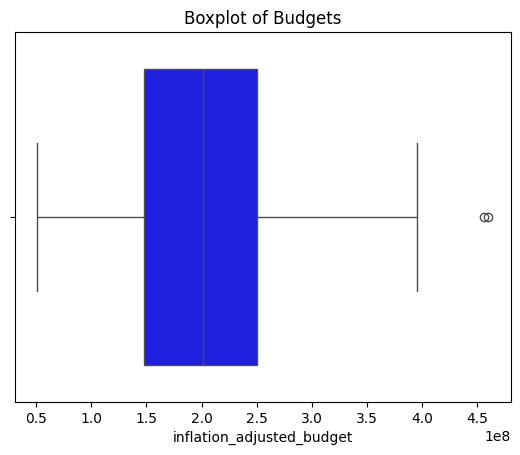

In [ ]:
# Visualize any outliers with boxplots
sns.boxplot(x=merged_df['inflation_adjusted_budget'], color='blue')
plt.title('Boxplot of Budgets')
plt.show()

Using a box plot we can see that there are some outliers past $4.5 million for their budget so let's take a look at which movies those are and what their Rotten Tomato Score is

In [ ]:
budget_outliers = merged_df[merged_df['inflation_adjusted_budget'] > 450000000][['film', 'release_date', 'inflation_adjusted_budget', 'budget', 'tomatometer']]
budget_outliers

,film,release_date,inflation_adjusted_budget,budget,tomatometer
4,Avengers: Age of Ultron,5/1/2015,455925262.0,365000000.0,76.0
5,Avengers: Endgame,4/26/2019,459825329.0,400000000.0,94.0


Let's take a look at all the Avenger movies released and their respective Budget and Tomatometer


In [ ]:
avengers_movies = merged_df[merged_df['film'].str.contains('Avengers', case=False, na=False)][['film', 'release_date', 'inflation_adjusted_budget', 'budget', 'tomatometer']]
avengers_movies

,film,release_date,inflation_adjusted_budget,budget,tomatometer
3,Avengers Infinity War,4/27/2018,346761799.0,300000000.0,85.0
4,Avengers: Age of Ultron,5/1/2015,455925262.0,365000000.0,76.0
5,Avengers: Endgame,4/26/2019,459825329.0,400000000.0,94.0
52,The Avengers,5/4/2012,297644471.0,225000000.0,91.0


In [ ]:
# Have an idea of what the mean average is of the Rotten Tomato scores in the dataset
np.mean(merged_df['tomatometer'])

65.6029411764706

We can see that Avengers: Age of Ultron has a moderate Tomatometer of 76 but is still higher than the Tomatometer average of 65. But this film seems to be an outlier compared to all the other Avenger movies since it performed the worse despite having such a high budget. We know that this movie was one of the first to expand features such as new characters, complex CGI, and large scale action sequences which led to an increase in costs. Despite these efforts, we see that this did not lead to as much success as it would have liked but it seems to have set up success for the other Avenger movies following it since those increase in Tomatometer scores. This film likely allowed Marvel to learn where they could improve in production efficiency thus leading to a more streamlined approach in managing large casts and complex storylines for the movies following.

Thus leading us to Avengers: Endgame which has a really high Tomatometer of 94 and with context we can see that this was the last Avengers movie to conclude the MCU (Marvel Cinematic Universe) which wrapped up storylines for many of the marvel characters from across the MCU. This could be an indicator to why its budget was so high if they had to put more effort into making a good last Avengers to close the MCU. And we can see that this was successful in the sense that this film's Tomatometer is very high which shows that it was appreciated to conclude the MCU well.

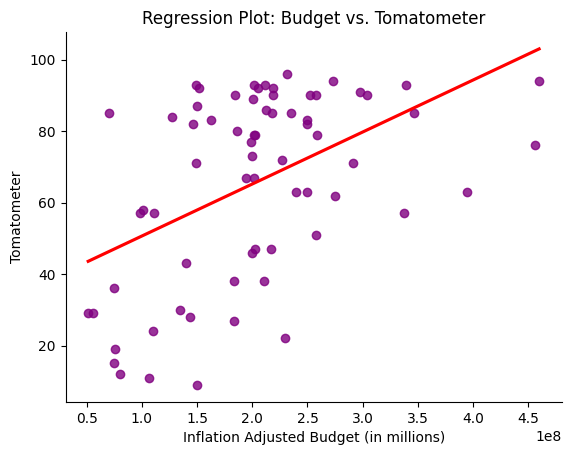

In [ ]:
# Visualize Relationship between Budget and Rotten Tomato Score
sns.regplot(data=merged_df, x='inflation_adjusted_budget', y='tomatometer',
            scatter_kws={'color': 'purple'}, line_kws={'color': 'red'}, ci=None)
plt.title('Regression Plot: Budget vs. Tomatometer')
plt.xlabel('Inflation Adjusted Budget (in millions)')
plt.ylabel('Tomatometer')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Since we are trying to see a relationship between Inflation Adjusted Budget and Tomatometer, we use a scatter plot with a regression line and we can see that there is a positive relatinoship between the two variables.

In [ ]:
# Correlation analysis
correlation, p_value = pearsonr(merged_df['inflation_adjusted_budget'], merged_df['tomatometer'])
print(f"Pearson Correlation: {correlation:.2f}")

Pearson Correlation: 0.48


We see that our Pearson Correlation coefficient is 0.48 which indicates a moderate positive linear relationship between 'inflation adjusted budget' and 'tomatometer'

In [ ]:
X = merged_df['inflation_adjusted_budget']
y = merged_df['tomatometer']

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            tomatometer   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              400.5
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                    5.70e-30
Time:                        05:11:45   Log-Likelihood:                         -319.84
No. Observations:                  68   AIC:                                      641.7
Df Residuals:                      67   BIC:                                      643.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

When using an OLS Regression we can see the results of standard error being very low (1.48e-08) showing that our coefficient is precise. Our t-value being 20.012 is extremely high which indicates a strong correlation between inflation adjusted budget and tomatometer. Then looking at our p-value being effectively 0.000 which is less than 0.05 which suggest that our coefficient is statistically significant. Being statistically significant indicates that the relationship between our variables is unlikely do to chance. Finally looking at the 95% confidence interval having a narrow range between [2.67e-07, 3.26e-07] meaning that there is less uncertainty about the true value of the coefficient. Thus giving us a consistent positive relationship between inflation adjusted budget and tomatometer.

**Conclusion**

After performing EDA on inflation adjusted budget and tomatometer, we can see that there exists a positive relationship between the two variables. Seeing that a general increase in budget leads to an increase in tomatometer score, we can conclude that film's recieving higher budgets are associated with a higher Rotten Tomato score which is not a product of random chance.

### Marvel Movie Character Screen Time Data

In this section, we are looking for a relationship between the different character's screen time and the Rotten Tomato ratings that the respective movies receive. We will be using the following dataframe in correspondance with the ones above.

In [ ]:
## link for csv:https://www.kaggle.com/datasets/jonbown/marvel-screen-time?resource=download

screen_time_df= pd.read_csv('/content/drive/MyDrive/cogs 108/mcu_movie_character_screen_time.csv')

The dataframe above lists the screentime of each Marvel character in the Marvel Movies produced up till now. In order to keep it in one variable, we are  going to find total the times for each character in seconds across all the movies they are a part of. We will define a function that will take the time in the screen time dataframe and convert it all to seconds using an if-else.

In [ ]:
def time_to_seconds(time_str):
    if isinstance(time_str, str):
        try:

            minutes, seconds = map(int, time_str.split(':'))
            return minutes * 60 + seconds
        except ValueError:
            return 0
    else:
        return 0
numeric_columns = screen_time_df.columns.difference(['Character'])

# Apply the time_to_seconds function to convert time values for each movie column
for col in numeric_columns:
    screen_time_df[col] = screen_time_df[col].apply(time_to_seconds)

# Calculate total screen time by summing the converted time (in seconds) across all movie columns
screen_time_df['total_screen_time'] = screen_time_df[numeric_columns].sum(axis=1)

screen_time_df_sorted = screen_time_df.sort_values(by='total_screen_time', ascending=False)

The plot below shows the top 15 characters screen time in comparison:

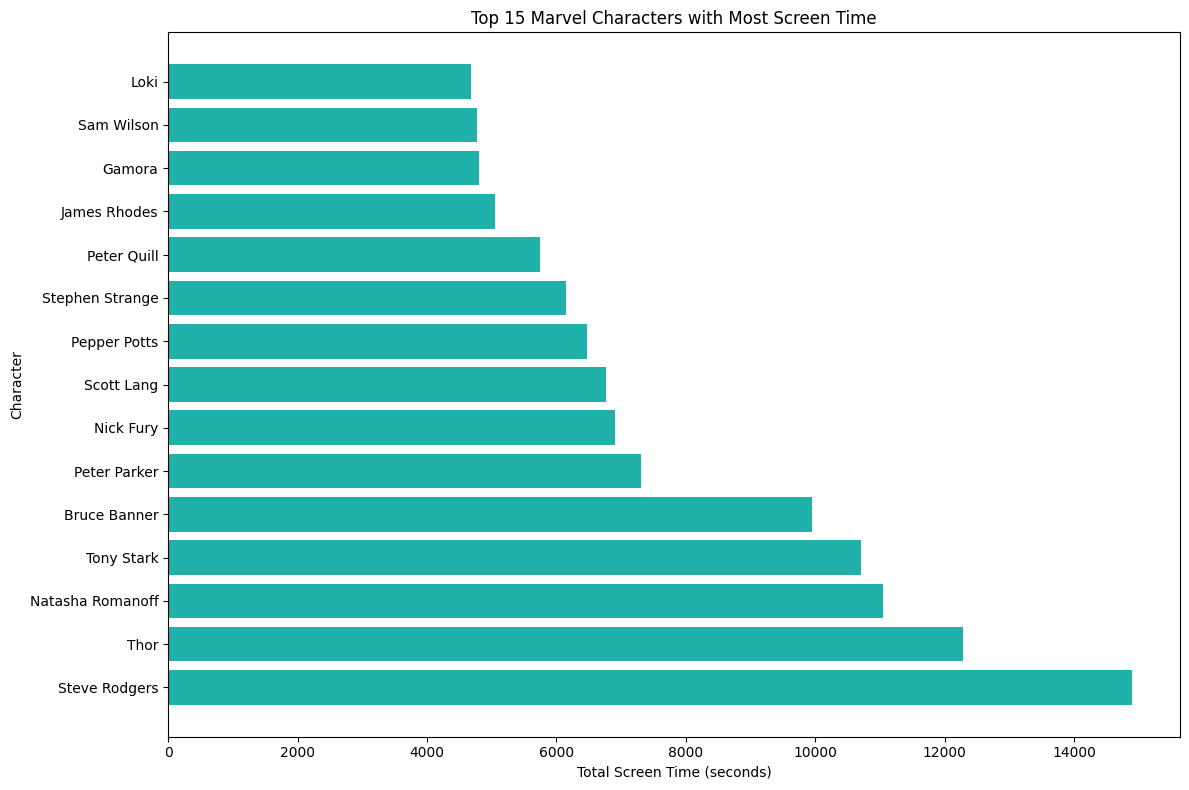

In [ ]:
screen_time_df_sorted_top15 = screen_time_df.sort_values(by='total_screen_time', ascending=False).head(15)

plt.figure(figsize=(12, 8))

plt.barh(screen_time_df_sorted_top15['Character'], screen_time_df_sorted_top15['total_screen_time'], color='lightseagreen')

plt.xlabel('Total Screen Time (seconds)')
plt.ylabel('Character')
plt.title('Top 15 Marvel Characters with Most Screen Time')

plt.yticks(rotation=0)

plt.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

The graph above focuses in on the top 15 characters whose screen time excedes those of the other characters in the movies. We will now analyzes the movies who had the best Rotten Tomato Ratings and compare them to the movies these superheroes are in -- to analyze if the present of certain superheros have an effect on the ratings. Below is a reference to the merged dataframe and it has the movies organized in descending order from highest tomatometer rating to the lowest. In those with a rating higher than 90 we will analyze the superheros present in those movies.

In [ ]:
merged_df_sorted = merged_df.sort_values(by=['tomatometer'], ascending=[False])
columns_view = ['film', 'tomatometer']

sub_merged_df = merged_df_sorted[columns_view]

sub_merged_df_filtered = sub_merged_df[sub_merged_df['tomatometer'] >= 90]
print(sub_merged_df_filtered)

## We get all the movies with a rating higher than 90

                                         film  tomatometer
7                               Black Panther         96.0
35                                   Iron Man         94.0
5                           Avengers: Endgame         94.0
49                    Spider-Man: No Way Home         93.0
45                               Spider-Man 2         93.0
38                                      Logan         93.0
60                             Thor: Ragnarok         93.0
43  Shang-Chi and the Legend of the Ten Rings         92.0
48                     Spider-Man: Homecoming         92.0
30                    Guardians of The Galaxy         92.0
52                               The Avengers         91.0
44                                 Spider-Man         90.0
15        Captain America: The Winter Soldier         90.0
13                 Captain America: Civil War         90.0
47                  Spider-Man: Far From Home         90.0
67                 X-Men: Days of Future Past         90

Using the Screen time data frame, we will isolate these movies and organize them by the top characters present. This is to find a pattern between the present of certain superheroes and the tomatometer rating. For the sake of simplicity, we will narrow it down to the top movies and top 10 characters moving forward (this is named the top10_subset) and remove any columns with missing data. We can focus in more on the correlation between certain characters and the movie's rating (measured success).

<Figure size 1600x1000 with 0 Axes>

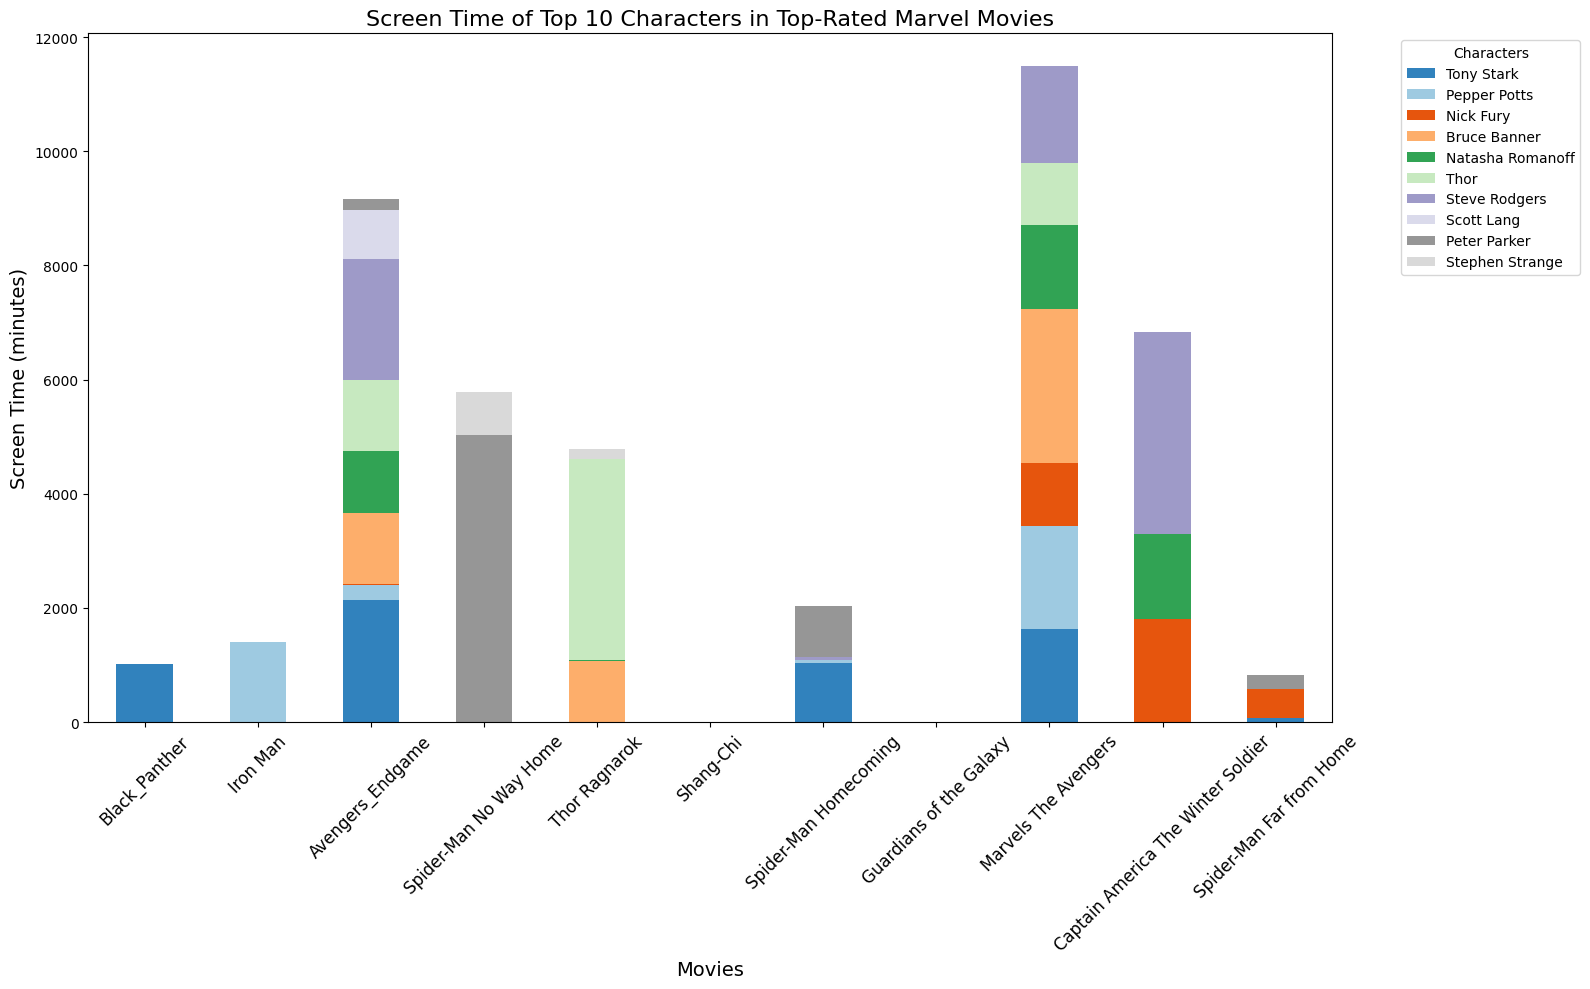

In [ ]:
movie_columns = ['Black_Panther', 'Iron Man', 'Avengers_Endgame', 'Spider-Man No Way Home',
                 'Thor Ragnarok','Shang-Chi','Spider-Man Homecoming','Guardians of the Galaxy','Marvels The Avengers',
                 'Captain America The Winter Soldier', 'Spider-Man Far from Home']
subset_df = screen_time_df[['Character'] + movie_columns]
subset_df_cleaned = subset_df.dropna(how='all', subset=movie_columns)

top_10_characters = screen_time_df.sort_values(by='total_screen_time', ascending=False).head(10)
top10_subset_df = subset_df_cleaned[subset_df_cleaned['Character'].isin(top_10_characters['Character'])]
top10_subset_df_filled = top10_subset_df.fillna(0)
top10_subset_df_filled.set_index('Character', inplace=True)

# stacked bar chart! yay - to compare screen time proportions
top10_subset_transposed = top10_subset_df_filled.T
plt.figure(figsize=(16, 10))
top10_subset_transposed.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='tab20c')

# Add titles and labels
plt.title("Screen Time of Top 10 Characters in Top-Rated Marvel Movies", fontsize=16)
plt.xlabel("Movies", fontsize=14)
plt.ylabel("Screen Time (minutes)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Characters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The stacked barplot helps us visualize the amount of screen time each character gets relative to one another in each movie; we can narrow this down with the characters' total screen time (across all movies) and the number of movies they appeared in and find the most represented character. This is what the stats_df dataframe will do for us: take the total screen time and number of movie appearences and organize this.

In [ ]:
total_screen_time = top10_subset_df_filled.sum(axis=1)

# Count the number of movies each character appears in
movie_counts = (top10_subset_df_filled > 0).sum(axis=1)

stats_df = pd.DataFrame({'Character': top10_subset_df_filled.index,
                         'Total Screen Time': total_screen_time,
                         'Movies Appeared In': movie_counts}).sort_values(by='Total Screen Time', ascending=False)

print("Top Characters by Total Screen Time:")
print(stats_df)

Top Characters by Total Screen Time:
                         Character  Total Screen Time  Movies Appeared In
Character                                                                
Steve Rodgers        Steve Rodgers               7425                   4
Peter Parker          Peter Parker               6360                   4
Tony Stark              Tony Stark               5895                   5
Thor                          Thor               5835                   3
Bruce Banner          Bruce Banner               5010                   3
Natasha Romanoff  Natasha Romanoff               4090                   4
Pepper Potts          Pepper Potts               3510                   4
Nick Fury                Nick Fury               3435                   5
Stephen Strange    Stephen Strange                930                   2
Scott Lang              Scott Lang                855                   1


 The order of characters with increasing screen time has changed, and this is due to the reorganiziation according to the TOP movies and not the overall Marvel Cinematic Universe. We now will zoom into the characters with:


1.   Most screen time in minutes
2.   Most movie appearences

From the output above, **Steve Rodgers has the highest screen time** in the highest rated movies, with Peter Parker following in second place. But since they have the same movie appearance count, we will focus on Steve Rodgers (captain America). Our next contestant is **Tony Stark whom has the highest movie appearence count** and follows in third place with the highest screen time thus becoming our next character of interest.

We will now take these characters of interest and focus on their impact to the tomatometer ratings.



In [ ]:
sub_merged_df_filtered['normalized_film'] = sub_merged_df_filtered['film'].str.strip().str.lower()
movie_columns_normalized = [sub_merged_df_filtered['film'].str.strip().str.lower()]

tony = [ 'Avengers Endgame' , 'Spider-Man: Homecoming', 'The Avengers'  ,'Iron Man', 'Spider-Man: Far from Home']
steve = [ 'Avengers Endgame', 'The Avengers', 'Captain America: The Winter Soldier' ]
tony_normalized = [movie.strip().lower() for movie in tony]
steve_normalized = [movie.strip().lower() for movie in steve]

TonySteve_movies = sub_merged_df_filtered[sub_merged_df_filtered['normalized_film'].isin(tony_normalized + steve_normalized)].copy()
print(TonySteve_movies)

                                   film  tomatometer  \
35                             Iron Man         94.0   
48               Spider-Man: Homecoming         92.0   
52                         The Avengers         91.0   
15  Captain America: The Winter Soldier         90.0   
47            Spider-Man: Far From Home         90.0   

                        normalized_film  
35                             iron man  
48               spider-man: homecoming  
52                         the avengers  
15  captain america: the winter soldier  
47            spider-man: far from home  


<ipython-input-28-79edbbe26cb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_merged_df_filtered['normalized_film'] = sub_merged_df_filtered['film'].str.strip().str.lower()


From the top rated movies, we narrow it down to the movies that only include that which our characters of interest are present in. Due to some possible miscalculations in the original dataframe, we removed Black Panther from Tony Stark's movie list (although the graph above notes his presence). After rewatching the movie, we found no Tony Stark screen time. We made the movies all lower case stripped from both the dataset with the tomato ratings and the screen time dataframe so comparison's are easier. Then combined that of our two characters of interest. We will now graph it to see if there is a correlation with the ratings.

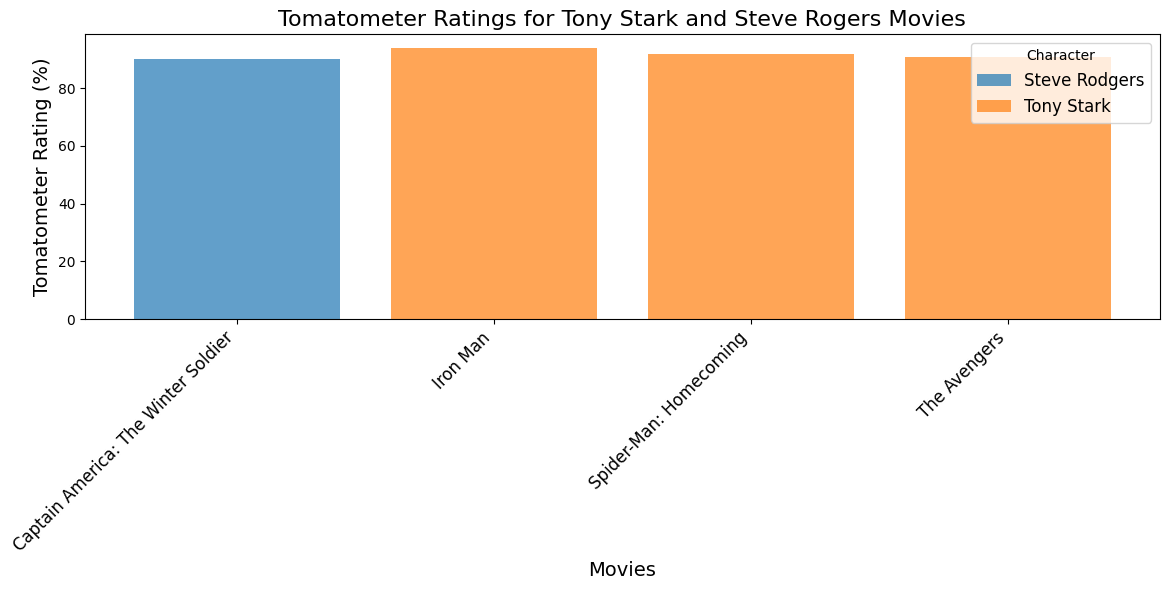

In [ ]:
tony_stark_movies = subset_df_cleaned[subset_df_cleaned['Character'] == 'Tony Stark']
tony_stark_movies_cleaned = tony_stark_movies.replace(0, np.nan).dropna(axis=1, how='all')

steve_rogers_movies = subset_df_cleaned[subset_df_cleaned['Character'] == 'Steve Rodgers']
steve_rogers_movies_cleaned = steve_rogers_movies.replace(0, np.nan).dropna(axis=1, how='all')

TonySteve_movies['Character'] = TonySteve_movies['film'].apply(lambda x: 'Tony Stark' if x in tony else ('Steve Rodgers'if x in steve else None))

plt.figure(figsize=(12, 6))
for character, group in TonySteve_movies.groupby('Character'):
   if not group.empty:
    plt.bar(group['film'], group['tomatometer'], label=character, alpha=0.7)
plt.title('Tomatometer Ratings for Tony Stark and Steve Rogers Movies', fontsize=16)
plt.xlabel('Movies', fontsize=14)
plt.ylabel('Tomatometer Rating (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Character', fontsize=12)
plt.tight_layout()
plt.show()



**First, keep in mind that some of the movies have both characters of interest present** although the whole bar may be one color.

We will now conduct a regression analysis on ratings and screentime datasets to see how they correlate. Our response variable is going to be the ratings (Tomatometer) and the independent variable is going to be screen time. We do need to merge the datasets for the regression, so we will do this on the Character Column since that is what they have in common. We find that there is no correlation.

In [ ]:
import statsmodels.api as sm

stats_df_reset = stats_df.reset_index(drop=True)
TonySteve_movies_reset = TonySteve_movies.reset_index(drop=True)

reg_merged = pd.merge(stats_df_reset, TonySteve_movies_reset, on='Character', how='inner')

combined_data_by_character = reg_merged.groupby('Character').agg({'Total Screen Time': 'sum',  'tomatometer': 'mean' }).reset_index()

combined_data_by_character['Total Screen Time'] = pd.to_numeric(combined_data_by_character['Total Screen Time'], errors='coerce')
combined_data_by_character['tomatometer'] = pd.to_numeric(combined_data_by_character['tomatometer'], errors='coerce')
combined_data_by_character = combined_data_by_character.dropna()

X = sm.add_constant(combined_data_by_character['Total Screen Time'])  # Add constant (intercept) to the model
y = combined_data_by_character['tomatometer']  # Target variable

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            tomatometer   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Dec 2024   Prob (F-statistic):                nan
Time:                        05:19:21   Log-Likelihood:                 59.322
No. Observations:                   2   AIC:                            -114.6
Df Residuals:                       0   BIC:                            -117.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                88.3114        in

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


### Box Office Revenue vs Rotten Tomato Ratings

In this section we will analyze the relationship between box office data for movies and Rotten Tomatoes ratings over time.


Below displays the relevant columns of the merged dataframe to perform our analysis. Given domestic, international, and worldwide box office revenue data, we will be using the inflation adjusted columns instead to provide a more holistic representation of monetary values as our analysis tracks data over time.

---


Since our question aims to discover whether or not there is a relationship between box office revenue and Rotten Tomatoes ratings, we will focus our research on international values to assess overall trends in revenue with no restriction to domestic or international markets.

In [ ]:
box_copy = merged_df.copy()

box = box_copy[['film', 'release_date', 'release_year', 'worldwide_box_office', 'inflation_adjusted_worldwide', 'tomatometer', 'rotten_tomato_audience_score']]
box

In [ ]:
type(box['release_date'].iloc[0])

In order to analyze trends over time, the release_date column is converted to Timestamp objects and the dataframe is sorted by date.

In [ ]:
pd.options.mode.chained_assignment = None
box['release_date'] = pd.to_datetime(box['release_date'], format='%m/%d/%Y')

In [ ]:
type(box['release_date'].iloc[0])

In [ ]:
box = box.sort_values(by='release_date')
box

Below is a scatterplot displaying the relationship between Tomatometer and box office revenue. As the regression line shows, there exists a positive relationship between the two variables; as box office revenue increases, Rotten Tomato ratings also increase.

In [ ]:
box.plot(kind='scatter', x='inflation_adjusted_worldwide', y='tomatometer', s=32, alpha=.8)
plt.xlabel('Worldwide Box Office Revenue (inflation adjusted)')
plt.ylabel('Tomatometer')
plt.title('Worldwide Box Office Revenue by Tomatometer')
plt.gca().spines[['top', 'right',]].set_visible(False)

x = box['inflation_adjusted_worldwide']
y = box['tomatometer']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='red', linewidth=2, label='Regression Line')

In [ ]:
correlation = box['inflation_adjusted_worldwide'].corr(box['tomatometer'])
correlation

Calculating the Pearson coefficient between 'inflation_adjusted_worldwide'  and 'tomatometer' we see that the value of roughly 0.62 shows a moderately positive linear relationship. As box office revenue increases, there is an associated increase in Tomatometer.

Factoring in year, below is a scatterplot showing 'tomatometer' over time. Each point on the graph represents an individual movie and the color as shown in the legend indicates the level of box office revenue.

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(box['release_year'], box['tomatometer'], c=box['inflation_adjusted_worldwide'], cmap='viridis', label='Tomatometer')
plt.colorbar(label='Box Office Revenue')


plt.xlabel('Release Year')
plt.ylabel('Tomatometer Rating')
plt.title('Tomatometer vs. Box Office Revenue Over Time')
plt.grid(True)

plt.legend()
plt.show()

Upon first glance, this scatterplot doesn't reveal much about whether or not a relationship exists between box office revenue and Tomatometer over time.
To further analyze, we will perform regression analysis between the columns 'release_year', 'inflation_adjusted_worldwide', and 'tomatometer'. Specifically, the OLS Regression will analyze whether or not inflation and release year impact Tomatometer.

In [ ]:
X = box[['inflation_adjusted_worldwide', 'release_year']]
X = sm.add_constant(X)
y = box['tomatometer']

model = sm.OLS(y, X).fit()

print(model.summary())

**Understanding the Results**


1.   inflation_adjusted_worldwide
<br>

The regression summary presents a **statistically signifcant** relationship between 'tomatometer' and 'inflation_adjusted_worldwide'. For each unit increase of box office revenue, Tomatometer increases by 2.772e-08 units. Although small, the size of this increase is better understood when considering how large box office revenue is (millions) in comparison to tomatometer (100 or less). With a t-stat of 6.279 (well above the critical value of 2) and a p-value rounded to 0 (below the significance level of 0.05), we are able to determine a strong relationship: as inflation adjusted box office revenue increases, Tomatometer increases.

2.   release_year
<br>

Contrastingly, the summary reveals a statistically insignifcant relationship between 'tomatometer' and 'release_year'. The p-value is very high at 0.782, and with a t-stat of 0.277, evaulated with alpha=0.05, these results indicate that 'release_year' is **not statistically significant** in relation to 'tomatometer'.



**Conclusion**

Upon analyzing inflation_adjusted_revenue, release_year, and tomatometer, there exists a strong positive relationship between revenue and Tomatometer. Based on the data, as the inflation adjusted worldwide box office revenue of a Marvel movie increases, its Tomatometer also increases. From this, we can conclude that higher box office revenue is associated with higher ratings.
<br>

When factoring in release_year to our analysis, we see that a movie's release year and Tomatometer is not statistically significant. From our range of 1998-2024, year has little to no impact on Marvel movie Rotten Tomatoes scores.

# Ethics & Privacy

One bias is the time factor, as newer movies have more social media traction than the older movies which can downplay the popularity of the older movies despite it possibly being the same or even more. There also is posed a privacy concern in pulling data from social media. Many platforms like instagram, twitter, facebook have their own privacy and terms of use which can limit the data we can access due to user privacy. Thus finding ways to minimize individual and personal data is something to consider. With the datasets proposed, with sources like Rotten Tomatoes and rating groups, often the data is subject to the crowd who runs these platforms - posing a collection bias. The ratings from these systems tend to reveal bias in their opinions due to culture and environment. Since audiences are worldwide, different regions will have different ratings for the MCU movies that could depend on their values. If certain demographics or regions are excluded from the MCU, those regions will most likely also be underrepresented in their opinion for MCU popularity

There are potential biases when looking at character popularity from social media platforms as well as promotion metrics from sources like Youtube, or ratings. Newer movies will automatically have an advantage due to higher engagement online as well overall increased usage of social media platforms. Data and responses would be catered to those who use those platforms which steer more towards the younger demographic. Thus excluding or underrepresented populations of people who may not be chronically online. Movies that were then released earlier (before high engagement online) might be deemed “less popular” since engagement online is lower –  however not actually being lower in popularity. There are also potential biases in the character's popularity. How is this defined? Character popularity can be commonly measured with the metric of screen time, which may not reflect their importance, skill, or overall role in the movie and thus pose an unfair perception of them from the audience. Those will have more screen time, typically main characters, then are pushed to have a higher popularity metric.

Analyzing the actors' stats on the social media platforms, taking into consideration other movies or entertainment sources they may be a part of can help us detect the existing differences. Based on the follower count, we can account for existing popularities in comparison to other actors, and how this affects the movie they are in. During the analysis we could possibly compare the follower count, in correspondence with the movies and awards they may have won. Taking the average of this can give us a general standing of the actors. The higher actors then can predictively pull in more revenue, more attraction in comparison to the lower ones.

(Keeping in mind the time and year the movie was released, so that metrics of popularity remain constant (accounting for differences in time))

Other ways to detect biases when communicating our analysis, is establishing measures of comparison, defined and set. Using metrics like screen time, actor popularity on social media, actor awards or other movies, will vary across marvel character - having their other movies on the back of the mind can help provide a base comparison (i.e. Captain America’s rom com in 2013 did  $XX in revenue, so due to that rise in popularity, this can pose a higher watching and revenue in the upcoming Marvel movie, due to the combination of Captain America popularity and MCU popularity)

When analyzing characters' popularity on social media, we will need to stay as public as we call in order to prioritize user privacy. Depending on the platform, collecting data might be difficult due to commercial reasons so it's safer to use datasets and statistics that have been published publicly, following privacy guidelines and citing sources, sites, and datasets.

Regarding equity, characters who have been around longer might have a stronger influence on the movie popularity and revenue than the more recent characters. However the more recent characters may or may not have a better presence online, gearing more towards younger audiences. Ensuring we are crossing from review sites, box offices, and not JUST social media will help balance this. Movies tend to highlight the main character (for good reason) so this can stimulate a bias towards actors who make more money. We can address the impact of screen time and prominence (socially, economically) in the analysis to possibly see if the actor net worth plays a factor as well.

In terms of pulling data from the social media platforms, in order to avoid any trouble from accessing individual data from users, collecting data like total number of likes, mentions, shares, and comments can be used. This prevents individual user privacy from being violated and provides a more aggregate level of data for us to use. It can also prevent any issues dealing with such user-oriented platforms. For older movies who had less of a social media presence due to the time, using other proxies like search trends could help mitigate any differences. Finding sources similar to Rotten Tomatoes like IMDb or JustWatch can help as a guide to ensure there’s a feasible standard. We can also define what we mean by character popularity in order to ensure there isn’t any superficial metric its defined by

# Discussion and Conclusion

Our project explores what variables like budget, character inclusion, and box office revenue impact the Rotten Tomato scores of Marvel movies. To achieve this, we utilized two datasets: the MCU Movie dataset and the Marvel Movie Box Office dataset. These datasets were merged and cleaned to enable effective analysis. For our exploratory data analysis (EDA), we performed univariate analysis. Prior to the analysis, we hypothesized that higher production budgets, the inclusion of popular Marvel characters, and strong box office performance would correlate with higher Rotten Tomato scores.

When we conducted EDA, we found no correlation between movie character popularity and Tomatometer scores. However, we observed a moderate positive correlation between inflation-adjusted budgets and Tomatometer scores, as well as between box office revenues and Tomatometer scores.We conclude that inflation-adjusted budgets and box office revenues have the greatest influence on Rotten Tomato scores for Marvel movies.

The scope of this project and the data used had some limitations. While higher budgets and box office revenues correlate with higher Tomatometer scores, other underlying variables, such as marketing strategies, may also influence the outcomes. Additionally, inflation-adjusted budgets and box office revenues are aggregated metrics. More detailed data, like weekly box office numbers or specific market trends, could give us a deeper understanding of Rotten Tomato scores. Despite these limitations, our research provides meaningful insights into the key factors behind the success of Marvel films, helping filmmakers and studios make more strategic and informed decisions

